 # Обработка пропусков в данных

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import scipy.stats as stats

In [39]:
data = pd.read_csv('/Users/a.fedorova/Desktop/учеба/Великолепная мага/2 сем/датасеты/netflix_titles.csv', sep=",")

In [40]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [41]:
data.shape

(7787, 12)

In [42]:
data.dtypes


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [43]:
data.isnull().sum()


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [82]:
data.isnull().mean()

show_id         0.000000
type            0.000000
title           0.000000
director        0.306793
cast            0.092205
country         0.065109
date_added      0.001284
release_year    0.000000
rating          0.000899
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

# Удаление колонок

#### Можно и необходимо удалить непоказательный столбец - directorтак как в этом столбце наблюдается более 30% пропущенных значений.

In [45]:
# Колонки, которые можно удалить:
colsForDel = ['director']

In [46]:
dataWithoutColumns = data.drop(columns=colsForDel)
dataWithoutColumns.shape

(7787, 11)

### Таким образом мы получили более достоверные данные, при этом потеряли 1 из 12 признаков, но не потеряли количество строк

# Удаление строк с пропусками
Попробуем удалить строки с пропусками из следующих колонок: name, host_name. В данных колнках пропусков меньше 5%, что позволяет удалить часть экспериментов без потери самих колонок.

In [47]:
colsForDelExp = ['rating', 'date_added']

In [48]:
# Удаление пропусков
data_drop_exp = data[colsForDelExp].dropna()
data_drop_exp.shape

(7770, 2)

### Посмотрим, как это повлияло на данные и их распределение:
Скопировала из лекции функцию для вывода графиков с распределениями

In [49]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig, ax = plt.subplots(figsize=(10,10)) 
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

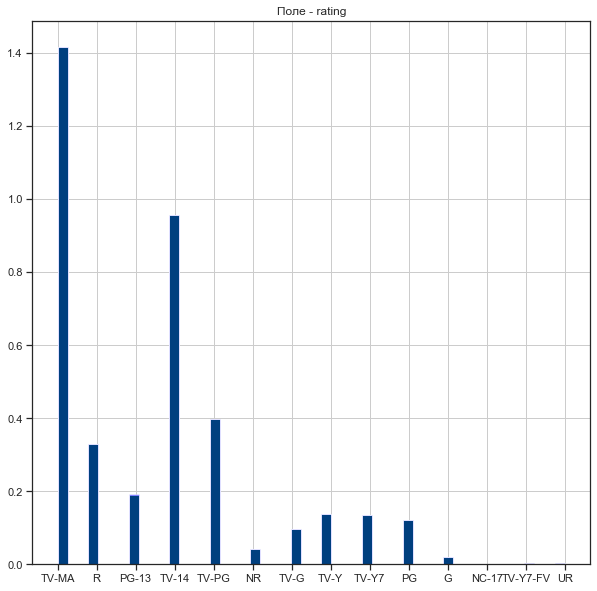

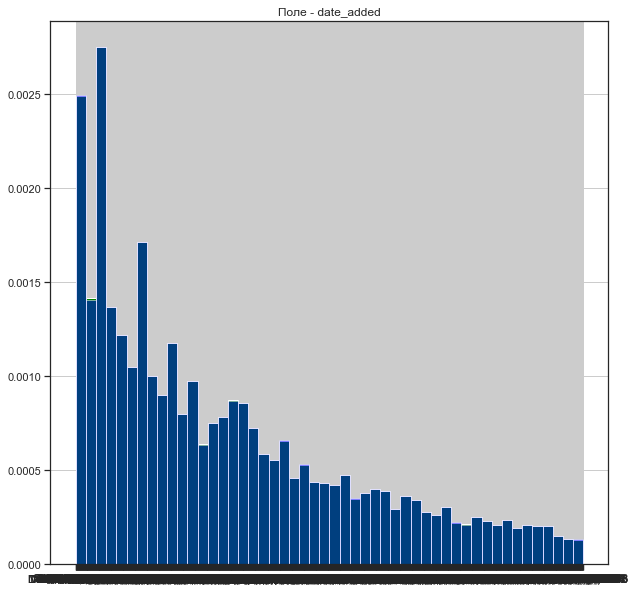

In [50]:
plot_hist_diff(data, data_drop_exp, colsForDelExp)

Заметна небольшая разница только на признаке date_added во второй колонке

# Заполнение значений для одного признака
### В данном датасете имеются пропуски только в категориальных признаках, поэтому рассмотрим избавление от них разными способами:

### Заполнение наиболее распространенным значением категории для поля name

In [101]:
dataNew = data[['country', 'cast']].copy()

In [102]:
imputerCountry = SimpleImputer(strategy='most_frequent', 
                        fill_value=None)
dataNewFreqImpCountry = imputerCountry.fit_transform(dataNew[['country']].values)

imputerCast = SimpleImputer(strategy='most_frequent', 
                        fill_value='country')
dataNewFreqImpCast = imputerCast.fit_transform(dataNew[['country']].values)

In [103]:
dataNew['country'] = dataNewFreqImpCountry
dataNew['cast'] = dataNewFreqImpCast

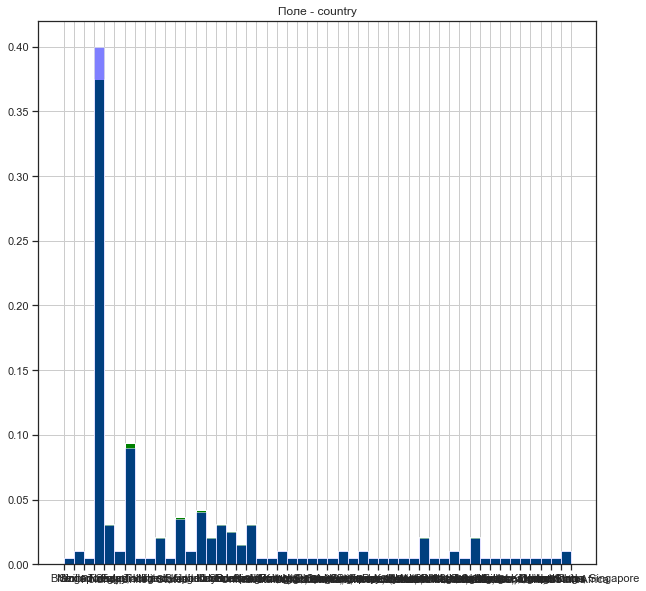

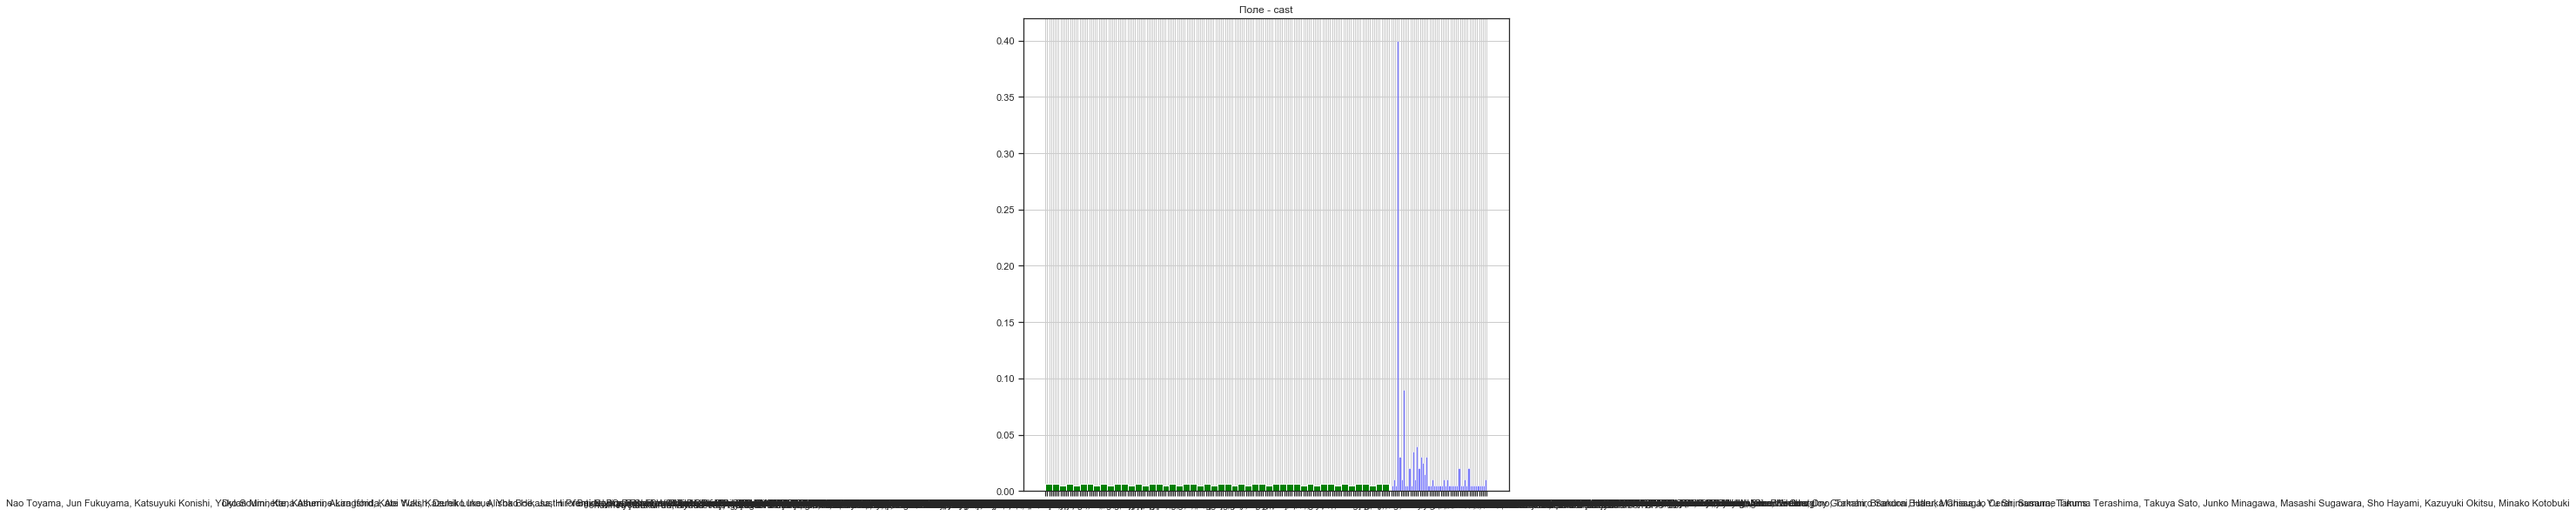

In [104]:
plot_hist_diff(data.head(200), dataNew.head(200), ['country', 'cast'])

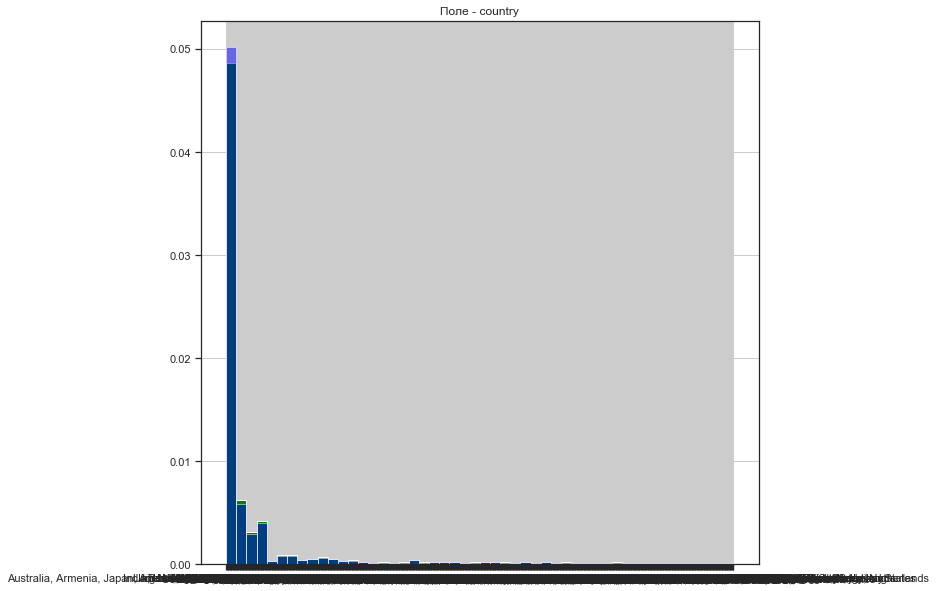

In [105]:
plot_hist_diff(data, dataNew, ['country'])

Данный признак оказался не очяень показательным на данной задаче, поэтому рассмотрим эту же задачу на признаке -  rating

In [106]:
dataNewRating = data[['rating']].copy()

In [107]:
imputerRating = SimpleImputer(strategy='most_frequent', 
                        fill_value=None)
dataNewFreqImpRating = imputerRating.fit_transform(dataNewRating[['rating']].values)

In [108]:
dataNewRating['rating'] = dataNewFreqImpRating

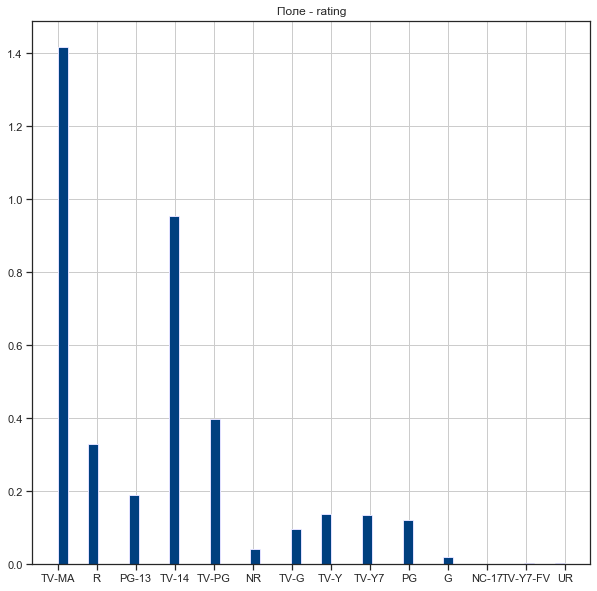

In [109]:
plot_hist_diff(data, dataNewRating, ['rating'])

In [110]:
imputerRating = SimpleImputer(strategy='constant',
                        fill_value='null')
dataNewConstRating = imputerRating.fit_transform(dataNewRating[['rating']].values)

In [111]:
dataNewRating['rating'] = dataNewConstRating

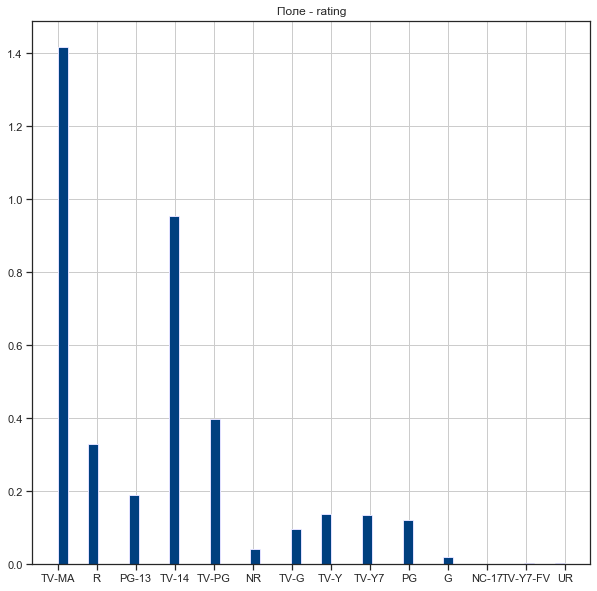

In [112]:
plot_hist_diff(data, dataNewRating, ['rating'])

In [113]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [114]:
GarageType_cat_na_temp, _, _ = impute_column(dataNewRating, 'rating', 'constant', fill_value_param='NA')

In [115]:
dataNewRating['rating'] = GarageType_cat_na_temp

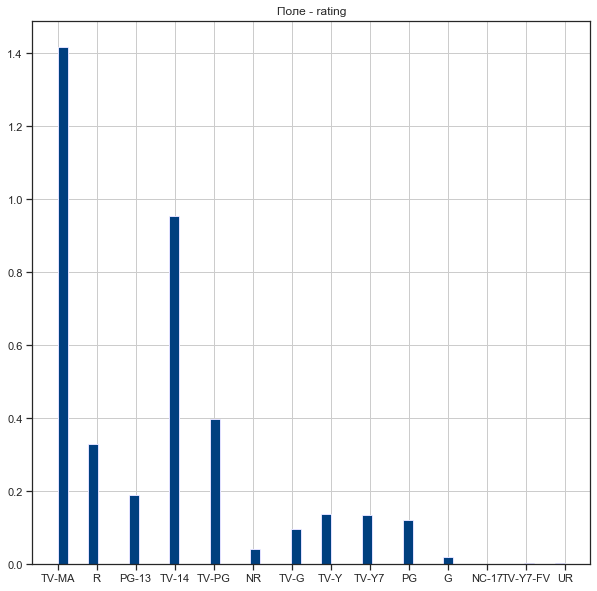

In [116]:
plot_hist_diff(data, dataNewRating, ['rating'])

# Преобразование категориальных признаков в числовые

Для данной задачи я выбрала другой датасет.

In [25]:
data2 = pd.read_csv('/Users/a.fedorova/Desktop/учеба/Великолепная мага/2 сем/датасеты/googleplaystore.csv', sep=",")

In [4]:
data2.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Так как это уже другой датасет, необходимо проверить его на нулевые значения. 

In [7]:
data2.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [119]:
data2.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

В пункте "Category" нет ни одного нулевого значения. Именно поэтому далее я буду рассматривать его. В этой колонке описывается категория, к которой относится приложение. 

In [120]:
data2.shape

(10841, 13)

In [121]:
cat_data = data2[['Category']]

In [122]:
print(data2['Category'].unique().size)
data2['Category'].unique()

34


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

Видно, что всего уникальных значений у этого признака - 34. Следовательно, этот признак можно **закодировать целочисленными значениями**.

In [123]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [124]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data2[['Category']])

/Users/a.fedorova/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [126]:
le.inverse_transform([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])


array(['1.9', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'], dtype=object)

In [127]:
print(data2['Type'].unique().size)
data2['Type'].unique()

4


array(['Free', 'Paid', nan, '0'], dtype=object)

Так как в типе есть одно пропущенное значение, я просто удалю строку, в которой оно содержится. 

In [135]:
colsForDelExp = ['Type']               
data_drop_exp = data2[colsForDelExp].dropna()
data_drop_exp.shape

(10840, 1)

In [136]:
print(data_drop_exp['Type'].unique().size)
data_drop_exp['Type'].unique()

3


array(['Free', 'Paid', '0'], dtype=object)

Теперь в данной колонке осталось только 3 значения: бесплатное 0 и платное. 

In [137]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data_drop_exp[['Type']])

In [138]:
data_drop_exp[['Type']].shape

(10840, 1)

In [139]:
cat_enc_ohe.shape


(10840, 3)

In [143]:
cat_enc_ohe.todense()[7030:7040]

matrix([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.]])

In [144]:
data2[['Type']][7030:7040]

,Type
7030,Free
7031,Free
7032,Free
7033,Free
7034,Free
7035,Free
7036,Free
7037,Paid
7038,Free
7039,Free


In [145]:
pd.get_dummies(data_drop_exp[['Type']])[7030:7040]

,Type_0,Type_Free,Type_Paid
7030,0,1,0
7031,0,1,0
7032,0,1,0
7033,0,1,0
7034,0,1,0
7035,0,1,0
7036,0,1,0
7037,0,0,1
7038,0,1,0
7039,0,1,0


# Нормализация данных

In [49]:
data2 = pd.read_csv('/Users/a.fedorova/Desktop/учеба/Великолепная мага/2 сем/датасеты/googleplaystore.csv', sep=",")

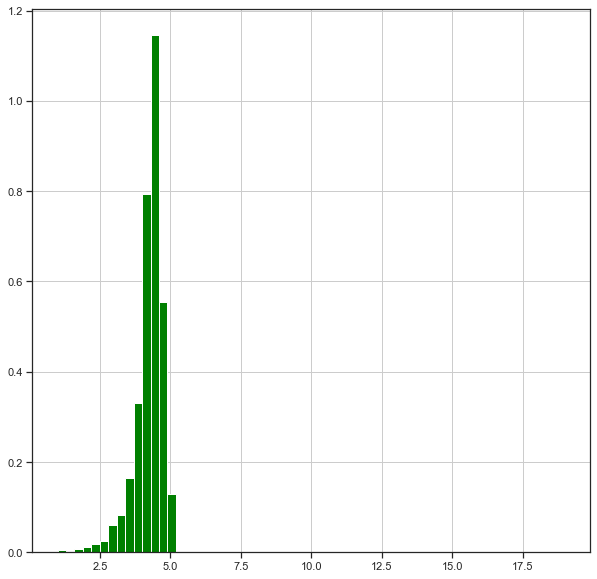

In [50]:
fig, ax = plt.subplots(figsize=(10,10)) 
data2['Rating'].hist(bins=60, ax=ax, density=True, color='green')

In [34]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

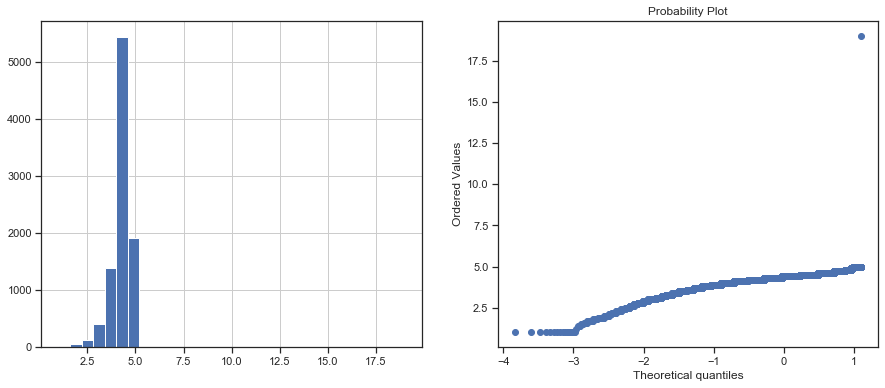

In [35]:
diagnostic_plots(data2, 'Rating')

## Логарифмическое преобразование

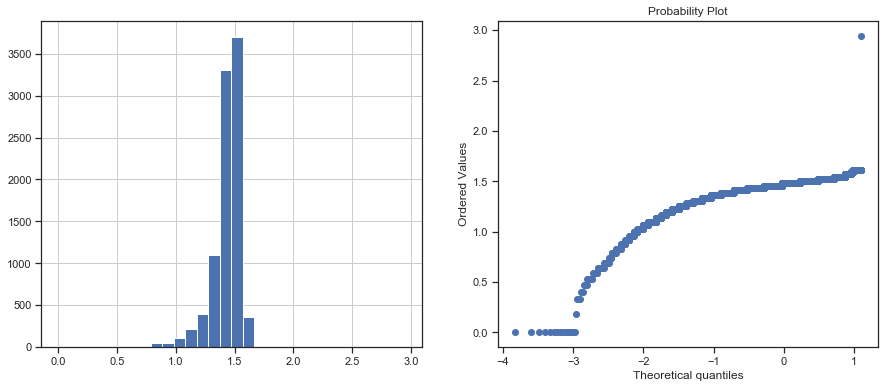

In [36]:
data2['RatingLog'] = np.log(data2['Rating'])
diagnostic_plots(data2, 'RatingLog')

## Обратное преобразование

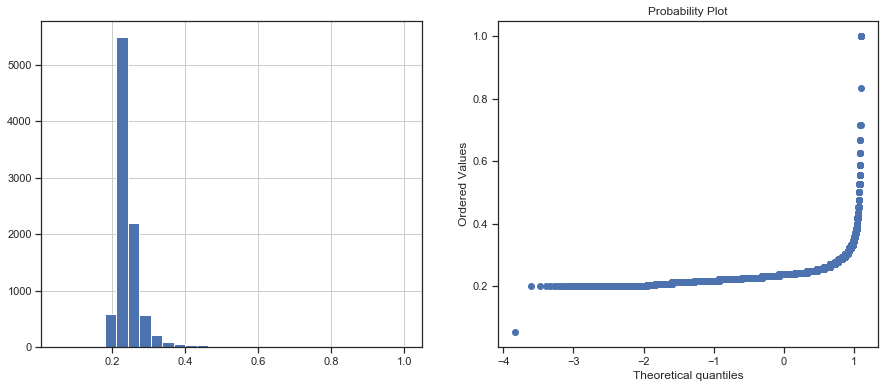

In [37]:
data2['RatingRev'] = 1/(data2['Rating']) 
diagnostic_plots(data2, 'RatingRev')

## Квадратный корень

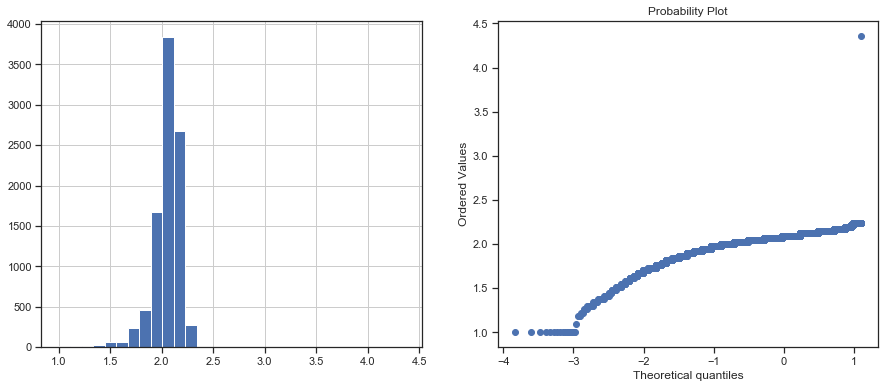

In [38]:
data2['Ratingsqr'] = data2['Rating']**(1/2) 
diagnostic_plots(data2, 'Ratingsqr')

## Возведение в степень

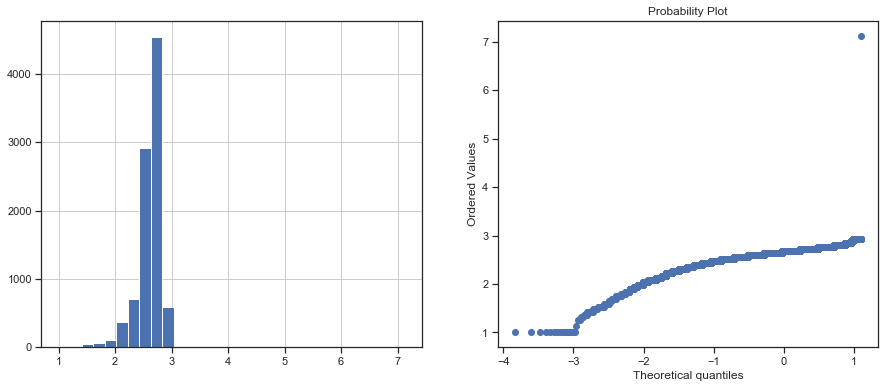

In [40]:
data2['RatingExp1'] = data2['Rating']**(1/1.5)
diagnostic_plots(data2, 'RatingExp1')

## Преобразование Бокса-Кокса

Оптимальное значение λ = 8.472135811722177


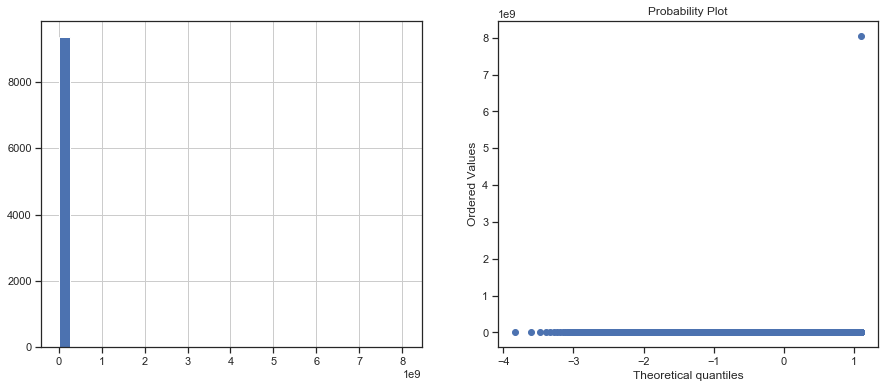

In [51]:
data2['RatingBoxcox'], param = stats.boxcox(data2['Rating']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data2, 'RatingBoxcox')

## Преобразование Йео-Джонсона

Оптимальное значение λ = 8.472135811722177


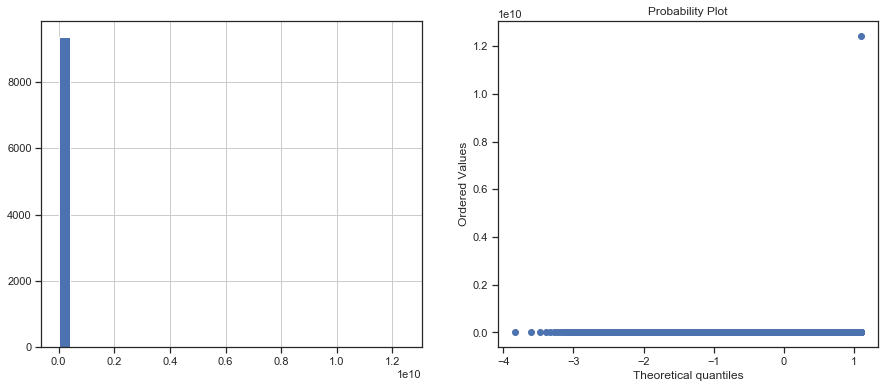

In [52]:
# Необходимо преобразовать данные к действительному типу
data2['Rating'] = data2['Rating'].astype('float')
data2['RatingYeojohnson'], param = stats.yeojohnson(data2['Rating']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data2, 'RatingYeojohnson')

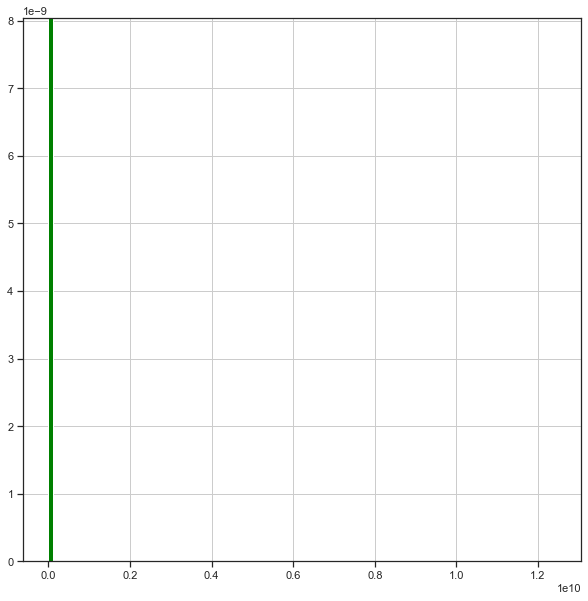

In [53]:
fig, ax = plt.subplots(figsize=(10,10)) 
data2['RatingYeojohnson'].hist(bins=100, ax=ax, density=True, color='green')